<a href="https://colab.research.google.com/github/HankRobot/Foundations-in-Machine-Learning/blob/main/Maxlikelihood_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.stats as stats

In [33]:
import seaborn as sns
#sns.set()
sns.set(color_codes=True)

## Uncertainty and probability
In the first lab, we had generated a data set $ (x_n,t_n) ,  n=1,…,N $ to introduce the idea of fitting a straight line to a bunch of such points. We had defined a function
$y=f(x;w)+ϵ=wx+ϵ,ϵ∼N(0,σ)$,
 
where we had chosen  $w=−2.5$  and $ϵ$  was a random number drawn from a normal distribution of mean  μ=0  and standard deviation  σ . As a result of this, every input of a number  xn  would yield a different, uncertain output. The training data set carries one such instantiation of the inherently uncertain pairing of input and output.

The uncertainty in the framework is captured by a probabilistic model. We say that our model proposes a certain weight  w  so that the deviations of the predictions  $f(x;w)$  from the targets  t  are captured by random numbers that are described by a normal (or Gaussian) distribution Normal$( μ,σ )$ or  $N(μ,σ)$ with probability density function (pdf)

$p(x;μ,σ)=\frac{1}{\sqrt{2πσ^2}}exp(\frac{−(x−μ)^2}{2σ^2})$.




First let us expore what this pdf conveys.

In [34]:
def gaussian(x, mean, stdev):
    return np.exp(-((x-mean)**2)/(2*stdev**2))/(np.sqrt(2*np.pi)*stdev)

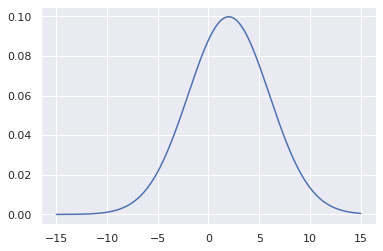

In [35]:
x = np.linspace(-15, 15, 250)
plt.plot(x, gaussian(x, 2, 4))

In [36]:
import scipy.integrate as integrate
print(integrate.quad(lambda x: gaussian(x, 0, 1), -1,1 ))

(0.682689492137086, 7.579375928402476e-15)


Text(0.5, 1.0, 'Area under the curve gives probability -- here 90% probability limits')

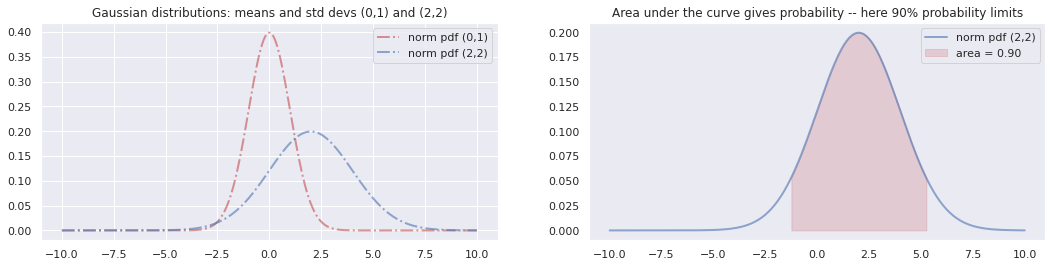

In [37]:
# create grid of 150 points from -3, 5
x = np.linspace(-10, 10, 250)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))
ax[0].plot(x, stats.norm.pdf(x), 'r-.', lw=2, alpha=0.6, label='norm pdf (0,1)')
ax[0].plot(x, stats.norm.pdf(x, 2, 2), 'b-.', lw=2, alpha=0.6, label='norm pdf (2,2)')
ax[0].legend()
ax[0].set_title("Gaussian distributions: means and std devs (0,1) and (2,2)")
x_90_idx = (x > stats.norm.ppf(0.05, 2, 2)) & (x < stats.norm.ppf(0.95, 2, 2))
ax[1].grid(False)
ax[1].plot(x, stats.norm.pdf(x, 2, 2), 'b-', lw=2, alpha=0.6,  label='norm pdf (2,2)')
ax[1].fill_between(x[x_90_idx], stats.norm.pdf(x[x_90_idx], 2, 2), color='r', alpha=.2, label='area = 0.90')
ax[1].legend()
ax[1].set_title("Area under the curve gives probability -- here 90% probability limits")

In [38]:
(x_lo, x_hi) = (stats.norm.ppf(0.05, 2, 2), stats.norm.ppf(0.95, 2, 2))
print("Range of x-values that account for 90% of probability of occurrence = (", x_lo, "," , x_hi, ")")
print("Confirm (by eye) that these values are at the limits of the domain of the function plotted above (right).")

Range of x-values that account for 90% of probability of occurrence = ( -1.2897072539029457 , 5.289707253902945 )
Confirm (by eye) that these values are at the limits of the domain of the function plotted above (right).


Range of x-values that account for 90% of probability of occurrence = ( -1.2897072539029457 , 5.289707253902945 )
Confirm (by eye) that these values are at the limits of the domain of the function plotted above (right).

The figures above show (LEFT) normal probability distribution functions (pdf) and (RIGHT) the area under the curve. The area under the curve is defined as the cumulative distribution functions:

$cdf(x)=\int_{−∞}^xpdf(x′){d}x′$.

In the following cell, the difference of the areas under the curve from  $x∈(−∞,−5.29)$  and  $x∈(−∞,−1.29)$  is shown.

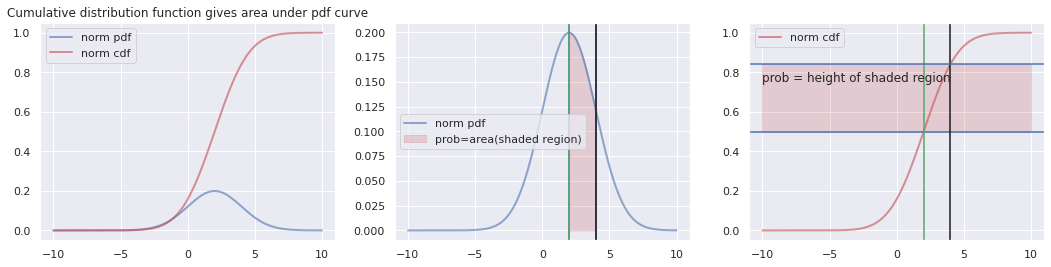

In [39]:
x = np.linspace(-10, 10, 250)
x1 = np.linspace(3, 4, 50)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))
ax[0].plot(x, stats.norm.pdf(x, 2, 2), 'b-', lw=2, alpha=0.6, label='norm pdf')
ax[0].plot(x, stats.norm.cdf(x, 2, 2), 'r-', lw=2, alpha=0.6, label='norm cdf')
ax[0].set_title("Cumulative distribution function gives area under pdf curve")
ax[0].legend()
ax[1].plot(x, stats.norm.pdf(x, 2, 2), 'b-', lw=2, alpha=0.6, label='norm pdf')
x1 = np.linspace(2, 4, 50) # want to graphically 
ax[1].axvline(2)
ax[1].axvline(4)
ax[1].fill_between(x1, stats.norm.pdf(x1, 2, 2), color='r', alpha=.2, label='prob=area(shaded region)')
ax[1].legend()
ax[2].plot(x, stats.norm.cdf(x, 2, 2), 'r-', lw=2, alpha=0.6, label='norm cdf')
# put vertical and horizontal lines at x=2, pdf(x=2)
ax[1].axvline(2, color = 'g')
ax[1].axvline(4, color = 'k')
y_2 = stats.norm.cdf(2,2,2)
ax[2].axhline(y_2)
# put vertical and horizontal lines at x=4, pdf(x=4)
ax[2].axvline(2, color = 'g')
ax[2].axvline(4, color = 'k')
y_4 = stats.norm.cdf(4,2,2)
ax[2].axhline(y_4)
ax[2].text(-10,.75,"prob = height of shaded region")

ax[2].fill_between(x, y_2, y_4, color='r', alpha=0.2)
ax[2].legend()

Relating pdf and cdf
The cdf is the anti-derivative of the pdf. The pdf is thus the derivative of the cdf. In the next cell you can see numerically the quantity
$pdf(x)(Δx)−{cdf(x+Δx)−cdf(x)}$.
 
What does this confirm?

In [40]:
delta_xs = [0.1**i for i in range(10)]
for delta_x in delta_xs:
    print(stats.norm.pdf(3.,2,2)*delta_x - (stats.norm.cdf(3.+delta_x, 2, 2) - stats.norm.cdf(3, 2, 2)))

0.026150378587619955
0.00022541440057445572
2.205896692277203e-06
2.2009582686580544e-08
2.2004626755705442e-10
2.2003796248540395e-12
2.1918663767514547e-14
2.7118054282644494e-16
8.262920572069747e-17
3.046738106457288e-17


# Linear regression from a probabilistic viewpoint: maximum likelihood estimation
What is the probability of observing a data point such as the winning time of a 100m sprint for a particular year? We propose a model that, given an input year  xn  produces an output time  yˆn  using a model
$y=f(x;w)=f(x;w0,w1)$.
 
For any two random variables  A,B  the conditional probability of observing a value  a  for the variable  A  given that a particular value  b  of  B  has been observed is denoted  $p(A=a|B=b)$ .

Once you have decided on a model parameterised by  $w=(w_0,w_1)$  (intercept, slope) of a straight line, your belief in observing a given data point  tn  (finish time of sprint) is high if you have chosen good values of  $w_0$  and  $w_1$ .

For any choice of  w0  and  w1  you can evaluate
$p(t_n|f(x_n;w_0,w_1))=p(t_n| w0+w_1x_n)$
 
the conditional probability of seeing the observed data pair  (xn,tn) .

Each data point  $(x_n,t_n) ,  n=1,…,N$  is chosen independently.

The joint probability of two random variables  $C$  and  $D$  stores the probability of jointly observing values  $C=c$  and  $D=d$  and is denoted  $P(C=c,D=d)$ . If the two variables  C  and  D  are independent,
$P(C=c,D=d)=P(C=c)P(D=d)$.
 
The joint probability of observing the data-set  $D={(x_1,t_1),(x_2,t_2),…,(x_N,t_N)}$  is the product of the probabilities of each individual datum:
$p(t_1|w_0+w_1x_1)p(t_2|w_0+w_1x_2)⋯p(t_N|w_0+w_1x_N)=:\prod_{n=1}^{N}p(t_n|w_0+w_1x_n)$.
 
Maximum likelihood estimation (MLE) : choose the model (here the parameters  $w_0$  and $w_1$ ) that maximises the probability of the observing the data.

But how do we calculate the probability
$p(tn|w0+w1xn)$?
 
We expect that for a good model, we would be able to predict the target on average. In other words, the residuals  $r_n:=t_n−w_0−w_1x_n ,  n=1,…,N$  should be distributed around  0 . We model that distribution by a Gaussian with mean  0  and some standard deviation  σ . 

In mathematical terms
$p(t_n|w_0+w_1x_n;σ)=\frac{1}{\sqrt{2πσ}}exp[−\frac{1}{2σ^2}(t_n−(w_0+w_1x_n))^2]$.

This is the likelihood function  L  of the model for the datum $( x_n,t_n)$.

For convenience, we take the logarithm of the likelihood for the data set  D  and maximise that instead. Alternatively we can minimise the negative of the log-likelihood (using the fact that the log of a product is a the sum of the logs):
$L(w_0,w_1,σ)=−L=−ln\prod_{n=1}^{N}p(t_n|w_0+w_1x_n)=\sum_{n=1}^{N}ln p(t_n|w_0+w_1x_n)=\frac{N}{2}ln(2πσ^2)+\frac{1}{2σ^2}\sum_{n=1}^{N}r^2_n$.

The minimisation of  L(w0,w1,σ)  with respect to  w=(w0,w1)  is exactly the same as in ordinary linear regression. The additional parameter  σ  can also be estimated by setting the corresponding derivative of  L  with respect to  σ  to  0 . The parameter  σ  is an additional handle to characterise the model that is learnt. It will give a quantification of the uncertainty of the model, and the uncertainty of the model predictions as well.

The minimisation of  L(w0,w1,σ)  with respect to  w=(w0,w1)  is exactly the same as in ordinary linear regression. The additional parameter  σ  can also be estimated by setting the corresponding derivative of  L  with respect to  σ  to  0 . The parameter  σ  is an additional handle to characterise the model that is learnt. It will give a quantification of the uncertainty of the model, and the uncertainty of the model predictions as well.

In [41]:
# Let us return to the women's 100m sprint times and fit a straight line through the data
olympics100f=np.asarray([
0, 11.90,
1, 11.50,
2, 11.50,
3, 11.00,
4, 11.40,
5, 11.08,
6, 11.07,
7, 11.08,
8, 11.06,
9, 10.97,
10, 10.54,
11, 10.82,
12, 10.94,
13, 10.75,
14, 10.93,
15, 10.78,
16, 10.75,
17, 10.71])
odate_f = olympics100f[::2]
otime_f = olympics100f[1::2]

11.494210526315785 -0.05304437564499428


Text(0.5, 1.0, 'The data that the learnt function produces does not look like the real data')

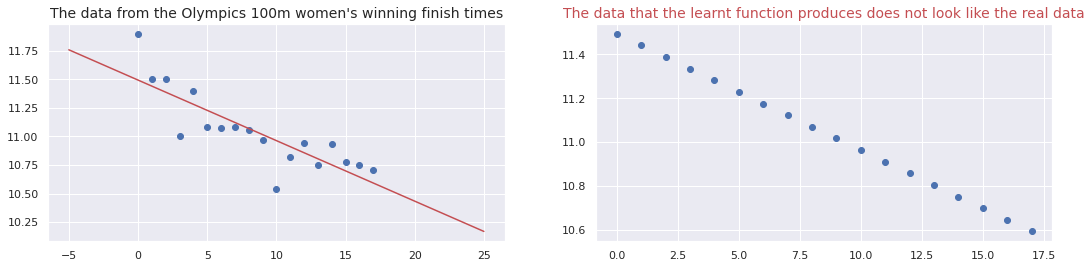

In [42]:
def linear_fit(X,y):
    num = (X*y).mean() - (X.mean()*y.mean())
    den = (X**2).mean() - (X.mean())**2
    w1 = num/den
    w0 = y.mean() - w1*X.mean()
    return w0, w1
w0fit, w1fit = linear_fit(odate_f, otime_f)
def learnt_fn(Xvariable, Xdata, ydata):
    X = Xvariable
    w_hat = linear_fit(Xdata, ydata)
    fn = 0.
    for i in range(len(w_hat)):
        fn += w_hat[i]*X**i
    return fn

print(w0fit, w1fit)
x = np.linspace(-5, 25, 250)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))
ax[0].scatter(odate_f, otime_f)
ax[0].plot(x, learnt_fn(x, odate_f, otime_f), c='r')
ax[0].set_title("The data from the Olympics 100m women's winning finish times", fontsize=14)
ax[1].scatter(odate_f, learnt_fn(odate_f, odate_f, otime_f) )
ax[1].set_title("The data that the learnt function produces does not look like the real data", fontsize=14, color='r')

# Calculating likelihoods
To calculate the likelihood, we calculate the probability of each data point and multiply them together. Remember, we are trying to calculate

$P(targets tn|modelM,inputs x_n)$.
 
The model we have chosen is  $y=w_0+w_1x$  and the probability model is a Gaussian with standard deviation  $σ$ . Each contribution to
$\prod_{n=1}^{N}p(t_n|w_0+w_1x_n)$
 
is obtained by using gaussian $(t_n - (w_0 + w_1 x_n)$, mean = 0, stdev = sigma) as defined above or by using stats.norm.pdf($t_n - (w_0 + w_1 x_n)$, 0, sigma). Since the probabilities are small and below machine precision it is better to work with logarithms.

# Check:
Make sure you understand the content of the next definition negloglik_normal by comparing it to the expression for the negative of the log likelihood a few cells ago.

In [43]:
def negloglik_normal(X, y, w0, w, sigma):
    loglik = 0 # NOTE: this has been corrected
    for x1, y1 in zip(X, y):
        prediction1 = w0 + np.dot(w, x1)
        residual = y1 - prediction1
        loglik += np.log(stats.norm.pdf(residual, 0, sigma)) # computes log(probability of residual) assuming gaussian
    return -loglik 

## Check:
Next, compare the negative log likelihood scores for a few choices of weight vectors with the best fit values. You may wish to try out other choices for entries of w_trial below. Think about a way of generating such choices of the possible values of w0 and w1 from yet another distribution.

In [44]:
w0best, w1best = linear_fit(odate_f, otime_f) # linear regression fit
w_trial = np.array([[12.0, -.1], [11.5, -.03], [12.5, -.03], [11.0,-.07],  [w0best, w1best]])
for w0, w1 in w_trial:
    nll = negloglik_normal(odate_f, otime_f, w0, w1, .05)
    print((w0,w1), nll)

(12.0, -0.1) 338.2577126737121
(11.5, -0.03) 281.5177126737122
(12.5, -0.03) 5333.517712673712
(11.0, -0.07) 1578.3977126737134
(11.494210526315785, -0.05304437564499428) 83.64962185843893


##Generative model: Making the model produce outputs that "looks like" real data
Let us analyse the results of the model fit. First, we will verify that the loss-function minimising weights give rise to residuals that satisfy the conditions
$\sum_nr_n=0,and\sum_nx_nr_n=0$.
 
We will then look at the residuals and their distribution.

In [45]:
residuals_f = learnt_fn(odate_f, odate_f, otime_f)-otime_f


print("Verifying conditions for vanishing of gradient of loss:\nSum of the residuals = ", residuals_f.sum())
print("Sum of product(residual times input): r_n times x_n  = ", odate_f.dot(residuals_f))

Verifying conditions for vanishing of gradient of loss:
Sum of the residuals =  -3.552713678800501e-15
Sum of product(residual times input): r_n times x_n  =  2.4158453015843406e-13


Text(0.5, 1.0, "Histogram of the residuals (women's)")

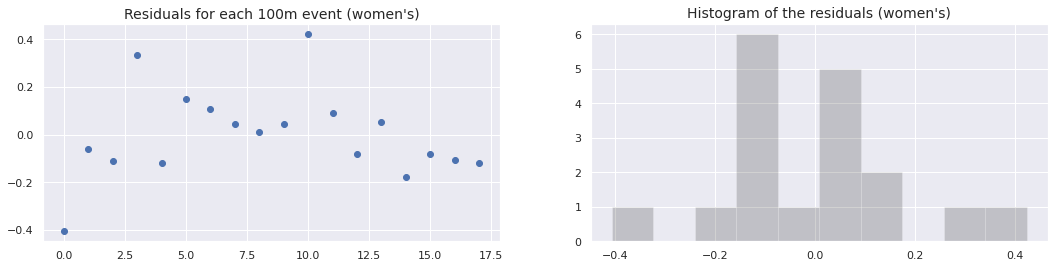

In [46]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))
ax[0].scatter(odate_f, residuals_f)
ax[0].set_title("Residuals for each 100m event (women's)", fontsize = 14)
ax[1].hist(residuals_f, color='k',alpha=0.2)
ax[1].set_title("Histogram of the residuals (women's)", fontsize = 14)

Capturing the characteristics of the residuals
The best fit line was a model that minimised the loss function, but the model "produces" data that does not look like real data. If we manage to also model the residuals, by fitting their histogram to a probability distribution we would then have an appropriate generative model. We do this using eq. (2.35) of FCML for the best-fit variance  $σ^2 :
σ^2=\frac{1}{N}\sum_{n=1}^{N}(t_n−w^Tx_n)^2.$

Text(0.5, 1.0, "Women's 100m: histogram of residuals and gaussian pdf with same std. dev.")

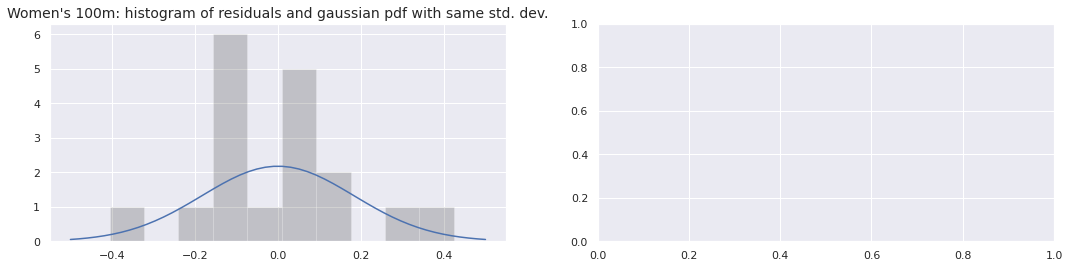

In [47]:
res_sigma_f = np.sqrt(np.square(residuals_f).sum()/len(residuals_f)) # standard deviation of residuals
x = np.linspace(-0.5,0.5,50)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))
ax[0].plot(x, stats.norm.pdf(x, 0, res_sigma_f), 'b-')
ax[0].hist(residuals_f,color='k',alpha=0.2)
ax[0].set_title("Women's 100m: histogram of residuals and gaussian pdf with same std. dev.", fontsize = 14)


# For completeness do the same for the 100m data for the men's event
# you will need to define:
# residuals_m = (prediction-from-model - otime_m)
# compute the standard deviation and plot a gaussian distribution over the histograms

# Effect of noise on parameter estimates: change the size of training set
Here we follow the presentation in Section 2.10 of FCML.

In [48]:
def data_generator(n):
#    np.random.seed(seed)
    noise = np.random.normal(0, 1, n)
    x = np.linspace(0, 1, n)
    y = -2 + 3*x + noise
    return x, y

Text(0, 0.5, 'w_1: slope values learnt')

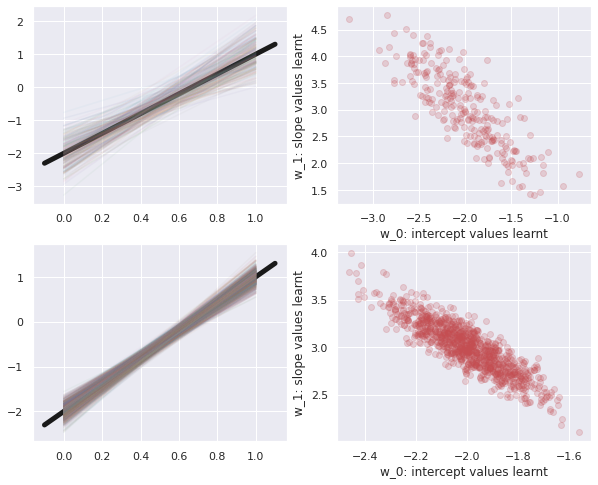

In [49]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))

# define a slightly bigger domain for the plotting of the TRUE underlying deterministic function 
X0 = np.linspace(-0.1,1.1,100)
ax[0][0].plot(X0, -2+3*X0, lw = 5, c='k') # lw sets line weight, here a heavy line 
X = np.linspace(0,1,100)
l_wts1 = []
l_sig1 = []
for i in range(250):  # 1000 data fitting operations
    Xd, yd = data_generator(20)  # generate a training sample of SIZE 20
    best_fit_w = linear_fit(Xd, yd)
    residuals_w = learnt_fn(Xd, Xd, yd)-yd
    best_fit_sigma = np.sqrt(np.square(residuals_w).sum()/len(residuals_w))
    l_wts1.append(np.asarray(best_fit_w))
    l_sig1.append(best_fit_sigma)
    ax[0][0].plot(X, learnt_fn(X, Xd, yd), alpha=0.05) # plot light lines (set by alpha, the trasparency parameter)
l_wts1 = np.asarray(l_wts1)
ax[0][1].scatter(l_wts1[:,0], l_wts1[:,1], alpha=0.2, c='r')
ax[0][1].set_xlabel('w_0: intercept values learnt')
ax[0][1].set_ylabel('w_1: slope values learnt')

ax[1][0].plot(X0, -2+3*X0, lw = 5, c='k')
l_wts2 = []
l_sig2 = []
for i in range(1000): # 1000 data fitting operations
    Xd, yd = data_generator(180) # generate a training sample of SIZE 180
    best_fit_w = linear_fit(Xd, yd)
    residuals_w = learnt_fn(Xd, Xd, yd)-yd
    best_fit_sigma = np.sqrt(np.square(residuals_w).sum()/len(residuals_w))
    l_wts2.append(np.asarray(best_fit_w))
    l_sig2.append(best_fit_sigma)
    ax[1][0].plot(X, learnt_fn(X, Xd, yd), alpha=0.05) # plot light lines (set by alpha, the trasparency parameter)
l_wts2 = np.asarray(l_wts2)
ax[1][1].scatter(l_wts2[:,0], l_wts2[:,1], alpha=0.2, c='r')
ax[1][1].set_xlabel('w_0: intercept values learnt')
ax[1][1].set_ylabel('w_1: slope values learnt')

### Your turn
Apart from the weights, we have also learnt the best-fit standard deviations, sigma stored in the lists l_sig1 and l_sig2. What do they look like? What use are they in making the model generate data that looks like realistic data, unlike the best fit line, as we saw earlier?

## Bayesian Inference - discrete variables
You will work through a few examples that illustrate how Bayesian reasoning works. First, you solve an inference problem of estimating parameters of a probability distribution. Next, you check for the consistency of updating our probabilities as degrees of belief when accumulating evidence based on Bayes' Rule. Finally, the advantage of having a probabilistic approach to modelling data is that it enables you to simulate more data that are distributed like the original data you learned the model from. In this sense, Bayesian models are generative models.

## What proportion of the earth's surface is water?
(From "Rethinking Statistics" by Richard McElreath)

You throw a small, but accurately drawn, globe in the air and catch it. Every time your right index finger falls on a blue patch indicating water, you record "W", else, record "L". From a finite sample of globe tosses you wish to infer the proportion of the earth's surface covered with water.

Let the unknown propotion of water be denoted $θ$ . The task is to go from the evidence of a finite sample of the form "WLWWWLWLL...." with the event of "W" occurring considered a "success" with probability  $θ$  and "L" a failure occurring with probability  $1−θ$ .

Below in the posterior_grid_approx function we use Bayes' rule to infer, from the observation of a sequence (of length "tosses" or  $N$ ) containing a number ("success" or  $n_W$ ) of occurrences of "W", the likely fraction of planetary water coverage as represented by the globe. For each hypothetical value of this fraction  $θ$ , stored in the p_grid array, the corresponding probability of seeing the observed data using the binomial probability mass function stats.binom.pmf:

$\begin{pmatrix}
  N \\
  n_W \\
 \end{pmatrix}θ^{nW}(1−θ)^{N−nW}$



In [50]:
def posterior_grid_approx(grid_points, success, tosses):
 
    # define grid: introduce points theta
    # posterior probability, p(theta) is returned
    p_grid = np.linspace(0, 1, grid_points)

    # define prior
    prior = np.repeat(1, grid_points)/grid_points  # uniform

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

In case you are wondering what the stats.binom.pmf returns, you can define your own binomial distribution to compute likelihoods from. That's what's done in the next cell. You can skip it if you are okay with trusting scipy.stats.

In [51]:
def bin(x, n, k):
    return math.factorial(n)/(math.factorial(k)*math.factorial(n-k))*(x**k)*(1-x)**(n-k)

point_grid = np.linspace(0, 1, 6) # an array of 6 points [0.,0.2,0.4,0.6,0.8,1.]
print("Check if we understand what stats.binom.pmf returns.  Are the following two lines equal?")
print(bin(point_grid,10,7))
print(stats.binom.pmf(7, 10, point_grid))

Check if we understand what stats.binom.pmf returns.  Are the following two lines equal?
[0.         0.00078643 0.04246733 0.21499085 0.20132659 0.        ]
[0.         0.00078643 0.04246733 0.21499085 0.20132659 0.        ]


Now for the inference. You are given a data set of 6 W and 3 L. There is a certain probability of generating such a data set from a binomial distribution with a parameter  θ  where  θ  is one of the values in p_grid (which were [0.,0.2,0.4,0.6,0.8,1.] in the example, as when points = 6). Using Bayes' rule:

$p(θ|data)=p(θ|N,n_W)=\frac{p(N,n_W|θ)p(θ)}{p(N,n_W)}=\frac{p(N,n_W|θ)p(θ)}{∫p(N,n_W|θ)p(θ)dθ}$
 
where we are going to use (see the definition of posterior_grid_approx) a uniform prior  $p(θ)$ =  constant (independent of  $θ$ ). Notice that the integration over all values of  θ  is performed in the discretised setting by the sum() operation.

Max of posterior probability is at the 4-th entry
 with trial parameter theta equal to 0.8 and p(0.8)=0.539


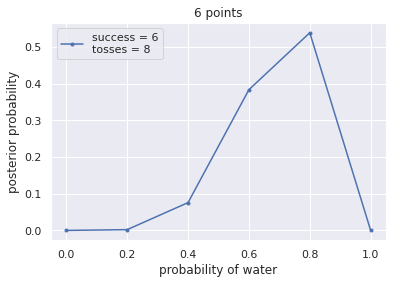

In [52]:
points = 6
w, n = 6, 8
p_grid, posterior = posterior_grid_approx(points, w, n)
plt.plot(p_grid, posterior, '.-', label='success = {}\ntosses = {}'.format(w, n))
plt.xlabel('probability of water')
plt.ylabel('posterior probability')
plt.title('{} points'.format(points))
plt.legend(loc=0);
print('Max of posterior probability is at the {}-th entry\n with trial parameter theta equal to {}\
 and p({})={}'.format(np.argmax(posterior),p_grid[np.argmax(posterior)], 
                      p_grid[np.argmax(posterior)],np.around(np.max(posterior),3)))

## The maximum of the posterior probability distribution is called the maximum a posteriori (MAP) estimate.

Your turn: You should experiment with different choices of tosses and success to see how the results change. In particular, to go from  $N=8$  and  $n_W=6$  to  $N=12$ ,  $n_W=8$  you would have had  $N^′=4$  more "tosses" and  $n^′_W=2$  more "successes".

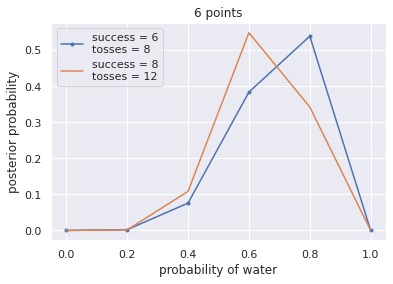

In [53]:
w, n = 6, 8
p_grid, posterior = posterior_grid_approx(points, w, n)
plt.plot(p_grid, posterior,'.-', label='success = {}\ntosses = {}'.format(w, n))
w, n = 8, 12
p_grid, posterior = posterior_grid_approx(points, w, n)
plt.plot(p_grid, posterior, '-', label='success = {}\ntosses = {}'.format(w, n))
plt.xlabel('probability of water')
plt.ylabel('posterior probability')
plt.title('{} points'.format(points))
plt.legend(loc=0);

## Updating probabilities using Bayes' Rule
When you gather more evidence, say an additional  $N^′$  data points with  $n^′_W$  occurrences of "W", you can use Bayes' Rule with the prior probability of parameter  θ  (probability of getting "W") set to the posterior distribution after  N  data points. The new posterior can be obtained simply:

$p(θ|new data,old data)=p(θ|N′,n^′_W,N,n_W)=\frac{p(N′,n^′_W|θ)p(θ|N,n_W)}{p(N′,n^′_W|N,n_W)}=\frac{p(N′,n^′_W|θ,N,n_W)p(θ|N,n_W)}{∫p(N′,n^′_W|θ,N,n_W)p(θ|N,n_W)dθ}$

In [54]:
def posterior_grid_from_prior(prior, success, tosses):
 
    # define grid: introduce points theta
    # posterior probability, p(theta) is returned
    
    grid_points = len(prior)
    p_grid = np.linspace(0, 1, grid_points)

    # define prior
    prior = prior 

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

If Bayesian updating is to be logically consistent, you would expect that the posterior obtained thus should coincide with the probability inferred by computing the posterior based on looking at all the data at once. We check this next.

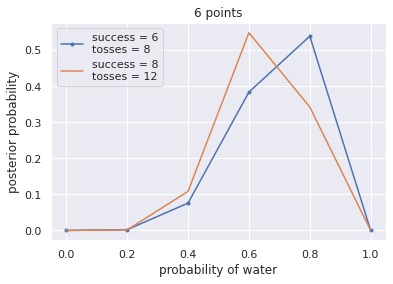

In [55]:
points = 6
w, n = 6, 8
p_grid, posterior = posterior_grid_approx(points, w, n)
plt.plot(p_grid, posterior,'.-', label='success = {}\ntosses = {}'.format(w, n))
wnew, nnew = 2, 4 # 2 additional successes from 4 tosses of the globe
p_grid, posterior = posterior_grid_from_prior(posterior, wnew, nnew)
[w, n] = [w+wnew, n+nnew]
plt.plot(p_grid, posterior, '-', label='success = {}\ntosses = {}'.format(w, n)) # updating total counts
plt.xlabel('probability of water')
plt.ylabel('posterior probability')
plt.title('{} points'.format(points))
plt.legend(loc=0);

Analytically, the prior distribution for binomial counts is a Beta distribution. It is a conjugate prior, in that the posterior distribution is also a Beta distribution. You should consult https://en.wikipedia.org/wiki/Beta_distribution. Below I invoke the scipy.stats implementation of the pdf to plot this analytically computed posterior. You may wish to experiment with different  nW ,  N , grid points, etc.

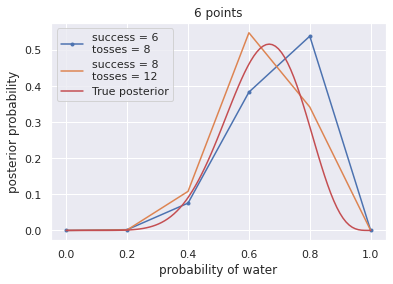

In [56]:
points = 6
w, n = 6, 8
p_grid, posterior = posterior_grid_approx(points, w, n)
plt.plot(p_grid, posterior,'.-', label='success = {}\ntosses = {}'.format(w, n))
wnew, nnew = 2, 4 # 2 additional successes from 4 tosses of the globe
p_grid, posterior = posterior_grid_from_prior(posterior, wnew, nnew)
[w, n] = [w+wnew, n+nnew]
plt.plot(p_grid, posterior, '-', label='success = {}\ntosses = {}'.format(w, n)) # updating total counts
x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta.pdf(x , w+1, n-w+1)/len(p_grid), c='r', label='True posterior')
plt.xlabel('probability of water')
plt.ylabel('posterior probability')
plt.title('{} points'.format(points))
plt.legend(loc=0);

## Generative model: sampling from the posterior
One of the benefits of building probabilistic models is their capacity to generate data that resembles the training data from which they were built. It is in this sense that they are called generative models. Below we will introduce a set of possible parameter values (the  theta  that stands for the probability of observing a "W") in p_grid (as before) and using all values of  θ  in p_grid with posterior probabilities (in posterior) as computed above we generate samples using the numpy function np.random.choice. (Since the entries in posterior store the probability of  θ , you may regard these as probabilities of probabilities.)

In [57]:
p_grid, posterior = posterior_grid_approx(grid_points=10, success=7, tosses=12)
nsamples = 100 # The next line returns nsample data points (an observation of a value of $\theta$)
samples = np.random.choice(p_grid, p=posterior, size=int(nsamples), replace=True) 

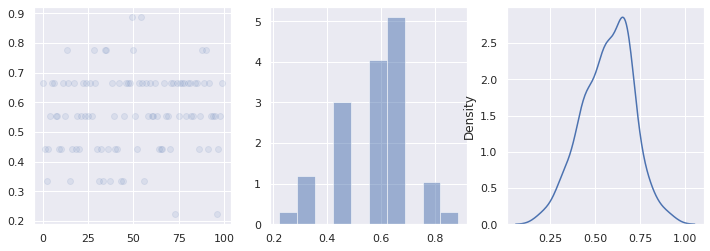

In [58]:
fig, ax = plt.subplots(1,3, figsize=(12,4))
ax[0].plot(samples, 'o', alpha=0.1)
ax[1].hist(samples,alpha=.5,density=True) 
sns.kdeplot(samples, ax=ax[2])

### Your turn 
Change the number of grid_points and the number of samples, nsamples to observe the outcomes.

What is kde? It stands for kernel density estimation -- it is a way of smoothing the histogram in order to produce a continuous probability density function (pdf).